## Uninón de datasets
Una vez seleccionadas las columnas con las que se desea trabajar previamente sobre los datasets de 2013 a 2017, se unen en un único dataset. Realizado esto, se ve la respectiva imputación de datos, la cual se realiza mediante un modelo de clasificación de regresión logística para los valores nulos presentes en las columnas del número de fallecidos, graves, leves y menos leves.

In [396]:
# Importacion de librerias que se emplearan
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import re

# librerias SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

## Dataset 2013

In [20]:
# Lectura del dataset y previsualizacion de los datos
df2013 = pd.read_csv("../data_limpia/Dataset_2013_ordenado.csv")
print(df2013.shape)
df2013.head()

(1768, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.714761,-33.621957,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,12489,0,1,0,0,0
1,-70.713433,-33.629206,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,20040,0,0,0,0,1
2,-70.712113,-33.601339,2013,SAN BERNARDO,CALLE 1 DE MAYO,EYZAGUIRRE,0,1,0,0,0,1
3,-70.710571,-33.601829,2013,SAN BERNARDO,CALLE 1 DE MAYO,FIDEL PINOCHET,0,1,1,0,0,0
4,-70.707259,-33.636547,2013,SANTIAGO,PORTALES,NaN,3000,0,0,1,0,0


## Dataset 2014

In [19]:
# Lectura del dataset y previsualizacion de los datos
df2014 = pd.read_csv("../data_limpia/Dataset_2014_ordenado.csv")
print(df2014.shape)
df2014.head()

(1690, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.797727,-33.456009,2014,PUDAHUEL,CAMINO LA FARFANA,NaN,400,0,0,1,0,0
1,-70.796959,-33.516373,2014,MAIPU,EL CONQUISTADOR,NaN,1660,0,0,0,1,0
2,-70.795044,-33.516192,2014,MAIPU,LAS TINAJAS,NaN,2838,0,0,0,1,0
3,-70.794488,-33.514124,2014,MAIPU,LA GALAXIA,NaN,1791,0,0,0,1,0
4,-70.793303,-33.532115,2014,MAIPU,4 PONIENTE,ALFREDO SILVA CARVALLO,0,1,0,0,0,1


## Dataset 2015

In [18]:
# Lectura del dataset y previsualizacion de los datos
df2015 = pd.read_csv("../data_limpia/Dataset_2015_ordenado.csv")
print(df2015.shape)
df2015.head()

(1841, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.798508,-33.364435,2015,PUDAHUEL,CAMINO RENCA LAMPA,CAMINO AGUAS CLARAS,0,1,0,1,0,0
1,-70.797142,-33.354941,2015,QUILICURA,CAMINO LO ECHEVERS,CAMINO PRIVADO,0,1,0,1,0,0
2,-70.797944,-33.511716,2015,MAIPU,EL CONQUISTADOR,SENADORA MARIA DE LA CRUZ,0,1,0,1,0,1
3,-70.797199,-33.513151,2015,MAIPU,EL CONQUISTADOR,PINTOR HORACIO GARCIA,0,1,0,1,0,0
4,-70.797021,-33.518601,2015,MAIPU,EL CONQUISTADOR,NaN,1370,0,0,1,0,0


## Dataset 2016

In [17]:
# Lectura del dataset y previsualizacion de los datos
df2016 = pd.read_csv("../data_limpia/Dataset_2016_ordenado.csv")
print(df2016.shape)
df2016.head() 

(1875, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.921865,-33.088773,2016,TILTIL,EL ESPINO,NaN,39,0,0.0,0.0,0.0,1.0
1,-70.918988,-33.089121,2016,TILTIL,BARROS ARANA,NaN,10,0,0.0,0.0,0.0,2.0
2,-70.881707,-33.278868,2016,LAMPA,BAQUEDANO,NaN,65,0,0.0,0.0,1.0,0.0
3,-70.873056,-33.285780,2016,LAMPA,PEDRO AGUIRRE CERDA,SGTO ALDEA,0,1,0.0,0.0,0.0,1.0
4,-70.870458,-33.282819,2016,LAMPA,PEDRO AGUIRRE CERDA,NaN,1370,0,0.0,0.0,0.0,1.0


## Dataset 2017

In [27]:
# Lectura del dataset y previsualizacion de los datos
df2017 = pd.read_csv("../data_limpia/Dataset_2017_ordenado.csv")
print(df2017.shape)
df2017.head() 

(2065, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.542220,-33.473719,2017,PEÑALOLEN,CONSISTORIAL,TAGUA TAGUA,0,1,NaN,NaN,NaN,NaN
1,-70.542197,-33.450019,2017,LA REINA,VALENZUELA LLANOS,NaN,8622,0,0.0,0.0,0.0,1.0
2,-70.541772,-33.476860,2017,PEÑALOLEN,GRECIA,LOS MOLINEROS,0,1,0.0,1.0,1.0,2.0
3,-70.541637,-33.476406,2017,PEÑALOLEN,GRECIA,NaN,8735,0,0.0,0.0,0.0,1.0
4,-70.541548,-33.462810,2017,PEÑALOLEN,JOSE ARRIETA,DIPUTADA LAURA RODRIGUE,0,1,NaN,NaN,NaN,NaN


## Unión de datasets

In [361]:
frames = [df2013, df2014, df2015, df2016, df2017]
df = pd.concat(frames)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(9239, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.714761,-33.621957,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,12489,0,1.0,0.0,0.0,0.0
1,-70.713433,-33.629206,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,20040,0,0.0,0.0,0.0,1.0
2,-70.712113,-33.601339,2013,SAN BERNARDO,CALLE 1 DE MAYO,EYZAGUIRRE,0,1,0.0,0.0,0.0,1.0
3,-70.710571,-33.601829,2013,SAN BERNARDO,CALLE 1 DE MAYO,FIDEL PINOCHET,0,1,1.0,0.0,0.0,0.0
4,-70.707259,-33.636547,2013,SANTIAGO,PORTALES,NaN,3000,0,0.0,1.0,0.0,0.0


## Datos básicos del dataset

In [362]:
df.describe()

,X,Y,Anio,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,7989.000000,7883.000000,7792.000000,7683.000000
mean,-70.643993,-33.470311,2015.084316,1024.665224,0.728109,0.063087,0.319548,0.103183,0.799037
std,0.066069,0.070750,1.427747,2726.923291,0.444958,0.257634,0.545106,0.324628,0.794222
min,-70.921865,-33.648727,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-70.688593,-33.519193,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-70.643117,-33.454887,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,-70.591146,-33.424681,2016.000000,167.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,-70.482420,-33.088773,2017.000000,76771.000000,1.000000,3.000000,5.000000,3.000000,10.000000


In [363]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(9239, 12)
Tipo de variable de las columnas:
X               float64
Y               float64
Anio              int64
Comuna           object
Calle1           object
Calle2           object
Numero            int64
Interseccion      int64
Fallecidos      float64
Graves          float64
MenosGraves     float64
Leves           float64
dtype: object
Cantidad de valores nulos por columna:
X                  0
Y                  0
Anio               0
Comuna             0
Calle1             0
Calle2          2580
Numero             0
Interseccion       0
Fallecidos      1250
Graves          1356
MenosGraves     1447
Leves           1556
dtype: int64


## Revisión de posibles valores repetidos en comunas

In [364]:
df["Comuna"].value_counts()

SANTIAGO               970
PUENTE ALTO            744
LAS CONDES             584
PROVIDENCIA            503
MAIPU                  481
ÑUÑOA                  377
LA FLORIDA             358
PEÑALOLEN              330
QUINTA NORMAL          310
PUDAHUEL               305
ESTACION CENTRAL       290
EL BOSQUE              267
RECOLETA               266
QUILICURA              252
VITACURA               235
CERRO NAVIA            198
LA PINTANA             198
MACUL                  192
LA GRANJA              182
PEDRO AGUIRRE CERDA    165
SAN RAMON              165
LA CISTERNA            163
SAN BERNARDO           159
RENCA                  158
LO BARNECHEA           157
LA REINA               155
SAN JOAQUIN            151
CONCHALI               143
LO PRADO               142
SAN MIGUEL             131
INDEPENDENCIA          127
LO ESPEJO              105
HUECHURABA             104
COLINA                  74
CERRILLOS               52
NUNOA                   18
LAMPA                   14
P

<hr>

Los valores nulos de la columna "Calle2" se dejan como espacios vacíos.

In [365]:
df["Calle2"] = df["Calle2"].apply(lambda x: "" if(x is np.nan) else x)
print("Cantidad nulos Calle2: ", df["Calle2"].isna().sum())

Cantidad nulos Calle2:  0


## Imputación de valores nulos
Como se puede apreciar de una descripción anterior, el dataset no está completamente limpio, puesto que posee valores nulos en los registros de número de fallecidos, graves, menos graves y leves. Ante esta situación lo que se emplea es un modelo clasificador de regresión logística. <br>
Para este modelo, se extraerán todos los registros que no posean nulos esas cuatro variables de forma simultánea. Se trabajará solo con las variables de latitud, longitud, año, comuna (que se traspasa a variable dummie), si ocurrió o no en una interseccion, cantidad de fallecidos, graves, menos graves y leves.

In [366]:
# Se extraen las columnas que no poseen nulos esos campos
df2 = df[["X", "Y", "Comuna", "Interseccion", "Fallecidos", "Graves", "MenosGraves", "Leves"]][~df.Fallecidos.isnull() & ~df.Graves.isnull() & ~df.MenosGraves.isnull() & ~df.Leves.isnull()]
df2 = df2.reset_index(drop=True)
df2

,X,Y,Comuna,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.714761,-33.621957,SAN BERNARDO,0,1.0,0.0,0.0,0.0
1,-70.713433,-33.629206,SAN BERNARDO,0,0.0,0.0,0.0,1.0
2,-70.712113,-33.601339,SAN BERNARDO,1,0.0,0.0,0.0,1.0
3,-70.710571,-33.601829,SAN BERNARDO,1,1.0,0.0,0.0,0.0
4,-70.707259,-33.636547,SANTIAGO,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7678,-70.651021,-33.434221,SANTIAGO,1,0.0,0.0,0.0,1.0
7679,-70.650970,-33.400090,RECOLETA,1,0.0,0.0,0.0,1.0
7680,-70.650889,-33.550401,SAN RAMON,0,0.0,1.0,0.0,1.0
7681,-70.650763,-33.431405,RECOLETA,1,0.0,1.0,0.0,1.0


## Datos básicos del nuevo set de datos extraido

In [367]:
df2.describe()

,X,Y,Interseccion,Fallecidos,Graves,MenosGraves,Leves
count,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000,7683.000000
mean,-70.643589,-33.469605,0.679292,0.064037,0.319797,0.103475,0.799037
std,0.066382,0.071152,0.466779,0.259797,0.545181,0.324865,0.794222
min,-70.921865,-33.648727,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-70.688542,-33.518685,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-70.641764,-33.454013,1.000000,0.000000,0.000000,0.000000,1.000000
75%,-70.590891,-33.424270,1.000000,0.000000,1.000000,0.000000,1.000000
max,-70.482420,-33.088773,1.000000,3.000000,5.000000,3.000000,10.000000


In [368]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df2.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df2.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df2.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(7683, 8)
Tipo de variable de las columnas:
X               float64
Y               float64
Comuna           object
Interseccion      int64
Fallecidos      float64
Graves          float64
MenosGraves     float64
Leves           float64
dtype: object
Cantidad de valores nulos por columna:
X               0
Y               0
Comuna          0
Interseccion    0
Fallecidos      0
Graves          0
MenosGraves     0
Leves           0
dtype: int64


## Limpieza breve de valores outliers posibles presentes en las latitudes y longitudes

A continuación se revisa si existen valores outliers en las latitudes y longitudes del dataset empleado para el modelo de regresión logística.

In [369]:
fig = px.box(df2, y="X")
fig.show()

In [370]:
print("============================================================================")
print("Cantidad de valores outlier en la longitud:")
print(df2[(df2["X"] < -70.822441)].shape[0])
print("============================================================================")

Cantidad de valores outlier en la longitud:
12


Se puede apreciar que son muy pocos datos, por lo que para evitar un posible sobreajuste de modelo, se dejan dichos valores

In [371]:
fig = px.box(df2, y="Y")
fig.show()

In [372]:
print("============================================================================")
print("Cantidad de valores outlier en la latitud:")
print(df2[(df2["Y"] > -33.284862)].shape[0])
print("============================================================================")

Cantidad de valores outlier en la latitud:
59


Se puede apreciar que estos tampoco son un gran volumen de datos, por lo que tampoco se eliminan del dataset para evitar un sobreajuste.

## Se convierte a tipo entero las variables a predecir

In [373]:
df2["Fallecidos"] = df2["Fallecidos"].astype("int64")
df2["Graves"] = df2["Graves"].astype("int64")
df2["MenosGraves"] = df2["MenosGraves"].astype("int64")
df2["Leves"] = df2["Leves"].astype("int64")

## Modelo para los fallecidos

In [375]:
df2["Fallecidos"].value_counts()

0    7217
1     443
2      20
3       3
Name: Fallecidos, dtype: int64

Se extrae una muestra del 10% del total de _fallecidos = 0_ mediante un muestreo estratificado por comunas. Esto se realiza debido a que representan un gran volumen de datos, por lo que el clasificador se verá claramente desbalanceado si se deja esta muestra tal cual viene.

In [397]:
# Extraccion de solo aquellos registros que tengan fallecidos
df_fallecidos = df2[df2.Fallecidos == 0]
df_fallecidos = df_fallecidos.reset_index(drop=True)
df_fallecidos

,X,Y,Comuna,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.713433,-33.629206,SAN BERNARDO,0,0,0,0,1
1,-70.712113,-33.601339,SAN BERNARDO,1,0,0,0,1
2,-70.707259,-33.636547,SANTIAGO,0,0,1,0,0
3,-70.706052,-33.607581,SAN BERNARDO,1,0,0,0,1
4,-70.703659,-33.613648,SAN BERNARDO,1,0,0,0,1
...,...,...,...,...,...,...,...,...
7212,-70.651021,-33.434221,SANTIAGO,1,0,0,0,1
7213,-70.650970,-33.400090,RECOLETA,1,0,0,0,1
7214,-70.650889,-33.550401,SAN RAMON,0,0,1,0,1
7215,-70.650763,-33.431405,RECOLETA,1,0,1,0,1


In [398]:
# lista de DF por comuna que seran concatenados
frames = []

In [399]:
# funcion para obtener el 10% de las comunas de forma aleatoria y acumularlas en la lista 
def mergeComunas(lista):
    for e in lista:
        frames.append(df_fallecidos[df_fallecidos["Comuna"].str.contains(e)].sample(frac = 0.1, random_state = np.random.randint(1, 1000)))

In [400]:
# Llamada a la funcion y concatenacion de DF
mergeComunas(df_fallecidos["Comuna"].value_counts().index)
df_fallecidos2 = pd.concat(frames)
df_fallecidos2 = df_fallecidos2.reset_index(drop=True)
df_fallecidos2

,X,Y,Comuna,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.648331,-33.474462,SANTIAGO,1,0,0,0,1
1,-70.638983,-33.435611,SANTIAGO,1,0,0,0,1
2,-70.661685,-33.444408,SANTIAGO,1,0,0,0,1
3,-70.636420,-33.442615,SANTIAGO,1,0,0,0,1
4,-70.635960,-33.446117,SANTIAGO,1,0,0,0,1
...,...,...,...,...,...,...,...,...
716,-70.724442,-33.486492,CERRILLOS,1,0,0,0,1
717,-70.717607,-33.502957,CERRILLOS,0,0,0,0,1
718,-70.592930,-33.470632,NUNOA,0,0,0,0,1
719,-70.597844,-33.473826,NUNOA,0,0,1,0,1


Concatenacion del dataset de fallecidos = 0 y los otros casos.

In [401]:
df_final = pd.concat([df_fallecidos2, df2[df2.Fallecidos != 0]])
df_final = df_final.reset_index(drop=True)
df_final

,X,Y,Comuna,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.648331,-33.474462,SANTIAGO,1,0,0,0,1
1,-70.638983,-33.435611,SANTIAGO,1,0,0,0,1
2,-70.661685,-33.444408,SANTIAGO,1,0,0,0,1
3,-70.636420,-33.442615,SANTIAGO,1,0,0,0,1
4,-70.635960,-33.446117,SANTIAGO,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1182,-70.746149,-33.239651,COLINA,1,1,1,0,0
1183,-70.742485,-33.409042,RENCA,1,2,0,1,1
1184,-70.739688,-33.439944,LO PRADO,1,1,0,0,1
1185,-70.663688,-33.403742,INDEPENDENCIA,0,1,0,0,0


Aplicacion de variables dumies

In [402]:
# Variables dummies
columnas_cat = ["Comuna"]
df_completo = pd.get_dummies(df_final, columns = columnas_cat)
df_completo

,X,Y,Interseccion,Fallecidos,Graves,MenosGraves,Leves,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
0,-70.648331,-33.474462,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-70.638983,-33.435611,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-70.661685,-33.444408,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-70.636420,-33.442615,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-70.635960,-33.446117,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,-70.746149,-33.239651,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1183,-70.742485,-33.409042,1,2,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1184,-70.739688,-33.439944,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1185,-70.663688,-33.403742,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
df_completo.columns

Index(['X', 'Y', 'Interseccion', 'Fallecidos', 'Graves', 'MenosGraves',
       'Leves', 'Comuna_CERRILLOS', 'Comuna_CERRO NAVIA', 'Comuna_COLINA',
       'Comuna_CONCHALI', 'Comuna_EL BOSQUE', 'Comuna_ESTACION CENTRAL',
       'Comuna_HUECHURABA', 'Comuna_INDEPENDENCIA', 'Comuna_LA CISTERNA',
       'Comuna_LA FLORIDA', 'Comuna_LA GRANJA', 'Comuna_LA PINTANA',
       'Comuna_LA REINA', 'Comuna_LAMPA', 'Comuna_LAS CONDES',
       'Comuna_LO BARNECHEA', 'Comuna_LO ESPEJO', 'Comuna_LO PRADO',
       'Comuna_MACUL', 'Comuna_MAIPU', 'Comuna_NUNOA', 'Comuna_PADRE HURTADO',
       'Comuna_PEDRO AGUIRRE CERDA', 'Comuna_PEÑALOLEN', 'Comuna_PROVIDENCIA',
       'Comuna_PUDAHUEL', 'Comuna_PUENTE ALTO', 'Comuna_QUILICURA',
       'Comuna_QUINTA NORMAL', 'Comuna_RECOLETA', 'Comuna_RENCA',
       'Comuna_SAN BERNARDO', 'Comuna_SAN JOAQUIN', 'Comuna_SAN MIGUEL',
       'Comuna_SAN RAMON', 'Comuna_SANTIAGO', 'Comuna_VITACURA',
       'Comuna_ÑUÑOA'],
      dtype='object')

Correlación de pearson para evaluar si hay variables que se autoexplican

In [404]:
fig = px.imshow(df_completo.corr())
fig.update_layout(autosize=True, width=1000, height=1000)
fig.show()

No existe alguna autocorrelación considerable entre las variables.

## Aplicación de una regresión logística multinomial

Se empleó una regresión logística multinomial debido a que las features no son binarias. Además de acuerdo a lo observado con otros modelos como SVC con diferentes kernels, se pudo apreciar que éste era el más preciso.

In [405]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df_completo.drop("Fallecidos", axis = 1) # variables independientes
Y = df_completo["Fallecidos"]

In [406]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (949, 44)
Y:  (949,)
Tamaño de datos de testing: 
X:  (238, 44)
T:  (238,)


In [407]:
logisticRegr = LogisticRegression()
logReg = logisticRegr.fit(X_train, Y_train)
logReg_pred = logReg.predict(X_test)
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  69.74789915966386
Regresion Logistica Multinomial (f1-score):  68.18107546048722


C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [410]:
confusion_matrix(Y_test, logReg_pred)

array([[129,  24,   0],
       [ 46,  37,   0],
       [  2,   0,   0]], dtype=int64)

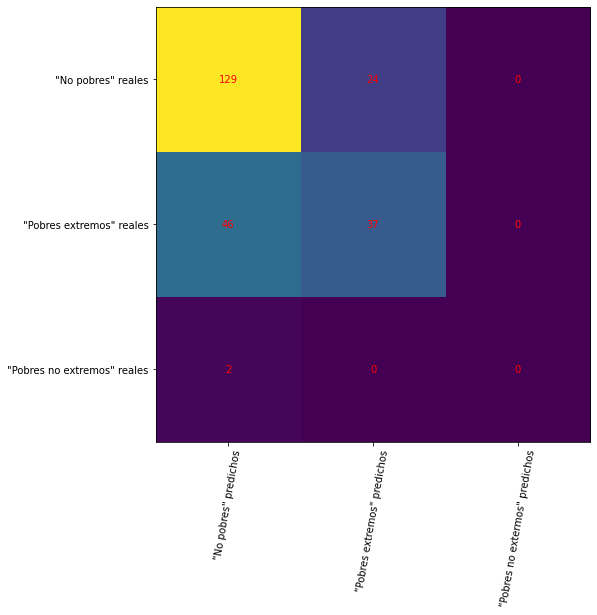

In [411]:
cm = confusion_matrix(Y_test, logReg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()